In [372]:
# Importing dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [373]:
# Importing dependencies
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sb

# Reflect Tables into SQLAlchemy ORM

In [374]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, and_, desc

In [375]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [376]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [377]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [378]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [379]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [380]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()         

('2017-08-23')

In [381]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
date_n_precp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()
date_n_precp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [382]:
# Save the query results as a Pandas DataFrame and set the index to the date column
rsts_dt_prp_df = pd.DataFrame(date_n_precp, columns=['date','prcp'])

# Setting index to the date column
rsts_dt_prp_df.set_index('date', inplace=True)

# Renaming the prcp column to full name 'precipitation'
rsts_dt_prp_df = rsts_dt_prp_df.rename(columns={'prcp': 'precipitation'})

# Dataframe sorted by date in ascending order (default)
rsts_dt_prp_df = rsts_dt_prp_df.sort_values('date')
rsts_dt_prp_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


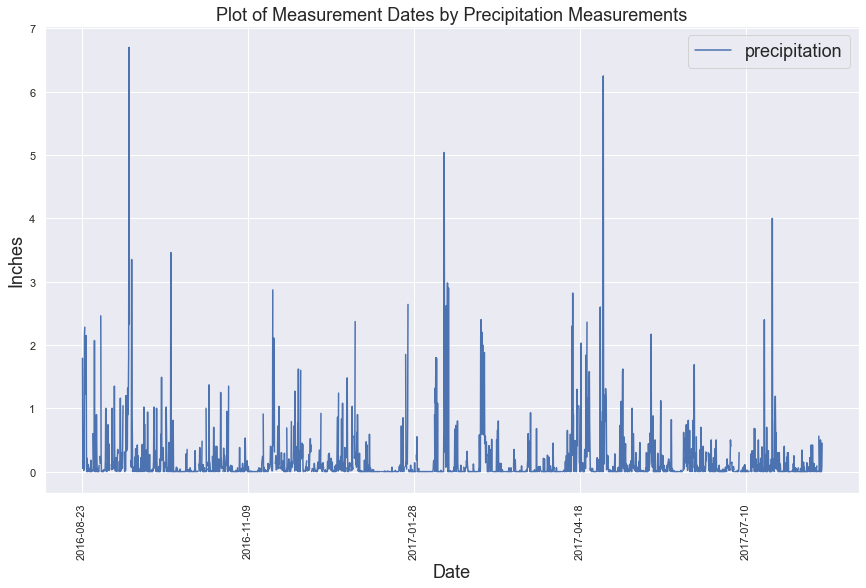

In [383]:
# Using Pandas Plotting with Matplotlib to plot the data
sb.set()
rsts_dt_prp_df.plot(rot=90, figsize=(13,8))
plt.xlabel("Date", fontsize=18)
plt.ylabel("Inches", fontsize=18)
plt.title("Plot of Measurement Dates by Precipitation Measurements", fontsize=18)
plt.legend(fontsize=18)
plt.show()

In [384]:
# Using Pandas to calcualte the summary statistics for the precipitation data
rsts_dt_prp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [385]:
# Design a query to calculate the total number stations in the dataset
tol_no_stns = session.query(station.name).count()
print(f"The total number of stations in the dataset is {tol_no_stns} stations")

The total number of stations in the dataset is 9 stations


In [386]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
actv_stns_fn = session.query(station.name, measurement.station, func.count(measurement.station).label('count')).\
        filter(measurement.station == station.station).group_by(station.name).order_by(desc('count')).all()
actv_stns_fn_df = pd.DataFrame(actv_stns_fn, columns=['station name','station id','count'])
actv_stns_fn_df

,station name,station id,count
0,"WAIHEE 837.5, HI US",USC00519281,2772
1,"WAIKIKI 717.2, HI US",USC00519397,2724
2,"KANEOHE 838.1, HI US",USC00513117,2709
3,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,2669
4,"MANOA LYON ARBO 785.2, HI US",USC00516128,2612
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,2202
6,"HONOLULU OBSERVATORY 702.2, HI US",USC00511918,1979
7,"PEARL CITY, HI US",USC00517948,1372
8,"UPPER WAHIAWA 874.3, HI US",USC00518838,511


In [387]:
# Querying for station with the highest number of observations
hghst_stn = session.query(station.name, measurement.station, func.count(measurement.station).label('count')).\
        filter(measurement.station == station.station).group_by(measurement.station).order_by(desc('count')).first()
stn_name = hghst_stn[0]
stn_wID = hghst_stn[1]
stn_name_cnt = hghst_stn[2]
print(f"The station with the highest number of observations is {stn_name} with ID: {stn_wID}, having {stn_name_cnt} counts.")

The station with the highest number of observations is WAIHEE 837.5, HI US with ID: USC00519281, having 2772 counts.


In [388]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
optns = [measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
mst_actv_stn_id = session.query(*optns).filter(measurement.station == 'USC00519281').\
                group_by(measurement.station).order_by(measurement.station).all()
pd.DataFrame(mst_actv_stn_id, columns=['most_active_station', 'lowest_temp (F)', 'highest_temp (F)', 'avg_temp (F)'])

,most_active_station,lowest_temp (F),highest_temp (F),avg_temp (F)
0,USC00519281,54.0,85.0,71.663781


In [389]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
mst_actv_stn_id_1 = session.query(*sel).filter(measurement.station == f'{stn_wID}').\
                group_by(measurement.station).order_by(measurement.station).all()
pd.DataFrame(mst_actv_stn_id_1, columns=['most_active_station', 'lowest_temp (F)', 'highest_temp (F)', 'avg_temp (F)'])

,most_active_station,lowest_temp (F),highest_temp (F),avg_temp (F)
0,USC00519281,54.0,85.0,71.663781


In [390]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lst_12_temp_1 = session.query(measurement.station, measurement.date, measurement.tobs).\
            filter(measurement.station == f'{stn_wID}').\
            filter(and_(func.date(measurement.date) <= "2017-08-23"),func.date(measurement.date) >="2016-08-23").\
            group_by(measurement.date).\
            order_by(measurement.date.desc()).all()
lst_12_temp_1

[('USC00519281', '2017-08-18', 79.0),
 ('USC00519281', '2017-08-17', 76.0),
 ('USC00519281', '2017-08-16', 76.0),
 ('USC00519281', '2017-08-15', 77.0),
 ('USC00519281', '2017-08-14', 77.0),
 ('USC00519281', '2017-08-13', 77.0),
 ('USC00519281', '2017-08-06', 83.0),
 ('USC00519281', '2017-08-05', 82.0),
 ('USC00519281', '2017-08-04', 77.0),
 ('USC00519281', '2017-07-31', 76.0),
 ('USC00519281', '2017-07-30', 81.0),
 ('USC00519281', '2017-07-29', 82.0),
 ('USC00519281', '2017-07-28', 81.0),
 ('USC00519281', '2017-07-27', 76.0),
 ('USC00519281', '2017-07-26', 75.0),
 ('USC00519281', '2017-07-25', 77.0),
 ('USC00519281', '2017-07-24', 75.0),
 ('USC00519281', '2017-07-23', 82.0),
 ('USC00519281', '2017-07-22', 77.0),
 ('USC00519281', '2017-07-21', 77.0),
 ('USC00519281', '2017-07-20', 77.0),
 ('USC00519281', '2017-07-19', 76.0),
 ('USC00519281', '2017-07-18', 76.0),
 ('USC00519281', '2017-07-17', 76.0),
 ('USC00519281', '2017-07-16', 80.0),
 ('USC00519281', '2017-07-15', 80.0),
 ('USC005192

In [391]:
# Parsing query results into a pandas DF
temp_mst_act_stn = pd.DataFrame(lst_12_temp_1, columns=['most_active_station', 'date', 'temperature'])

<function matplotlib.pyplot.show(close=None, block=None)>

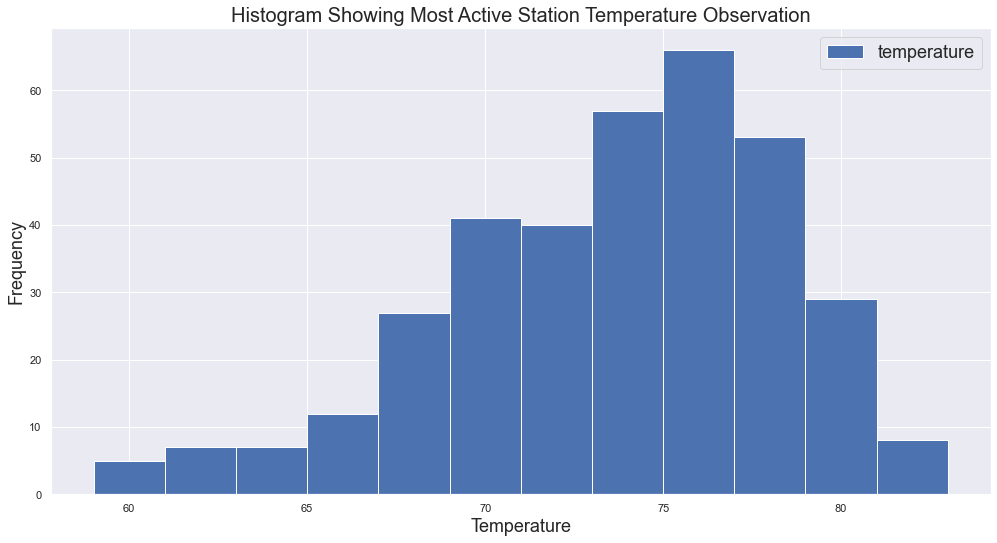

In [392]:
# Using the most active station id
# Plotting the results of the last 12 months of temperature observation data for most active station as a histogram
pd.DataFrame(temp_mst_act_stn['temperature']).plot.hist(bins=12, figsize=(15,8))
plt.xlabel('Temperature', fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.legend(fontsize=18)
plt.title("Histogram Showing Most Active Station Temperature Observation", fontsize=20)
plt.show

# Close session

In [393]:
# Close Session
session.close()